<a href="https://colab.research.google.com/github/karolinakuligowska/Projektowanie_systemow_informatycznych/blob/main/Rozwiazanie_podstawy_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instalacja i ładowanie wymaganych pakietów ----
  install.packages(c("tm", "wordcloud", "RColorBrewer", "ggplot2"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’




In [3]:

library(tm)
library(wordcloud)
library(RColorBrewer)
library(ggplot2)


Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




In [4]:
# Stworzenie funkcji do przetwarzania tekstu ----
process_text <- function(file_path) {
  # Wczytanie tekstu z pliku
  text <- tolower(readLines(file_path, encoding = "UTF-8"))
  # Usunięcie znaków interpunkcyjnych i cyfr
  text <- removePunctuation(text)
  text <- removeNumbers(text)
  # Usunięcie stop słów angielskich
  text <- removeWords(text, stopwords("en"))
  # Podział tekstu na słowa
  words <- unlist(strsplit(text, "\\s+"))
    # Usunięcie pustych elementów
  words <- words[words != ""]
  return(words)

}


# Stworzenie funkcji do obliczania częstości występowania słów ----
word_frequency <- function(words) {
  freq <- table(words)
  freq_df <- data.frame(word = names(freq), freq = as.numeric(freq))
  freq_df <- freq_df[order(-freq_df$freq), ]
  return(freq_df)
}

# Stworzenie funkcji do tworzenia chmury słów ----
plot_wordcloud <- function(freq_df, title, color_palette = "Dark2") {
  wordcloud(words = freq_df$word, freq = freq_df$freq, min.freq = 16,
            colors = brewer.pal(8, color_palette))
  title(title)
}


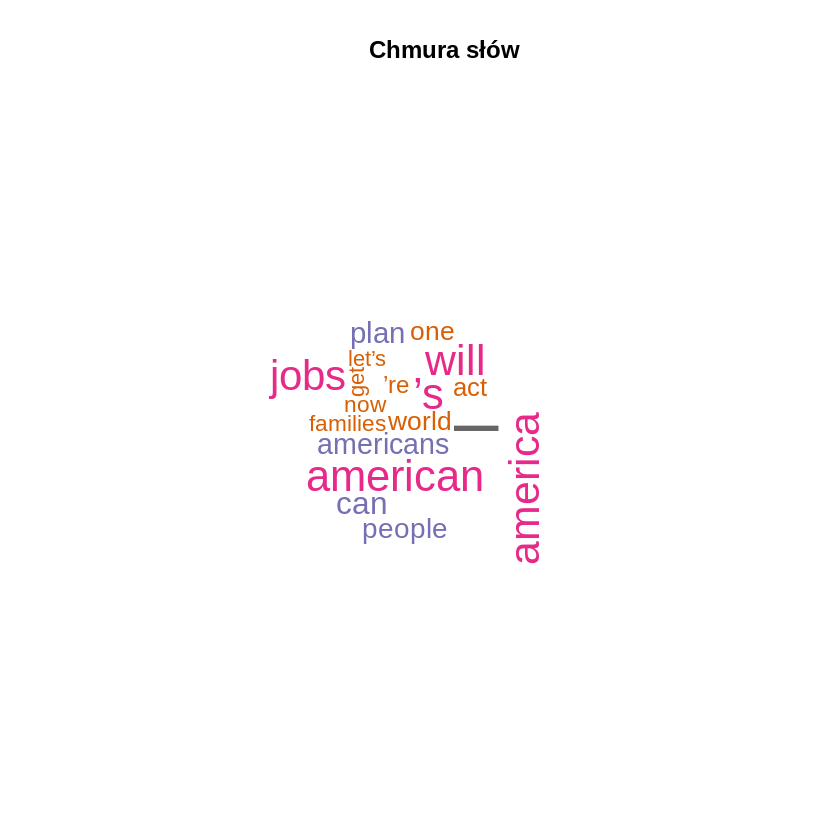

In [7]:
# Przykładowe użycie funkcji ----


# Jeden plik txt ----


# Wczytanie i przetworzenie tekstu
# file_path <- "sciezka/do/pliku.txt"  <= Uzupełnij nazwę pliku i ustaw Working Directory!
file_path <- "Biden2021.txt"
words <- process_text(file_path)


# Obliczenie częstości występowania słów
freq_df <- word_frequency(words)


# Tworzenie chmury słów
plot_wordcloud(freq_df, "Chmura słów", "Dark2")

In [8]:
# Wyświetlenie 10 najczęściej występujących słów
print(head(freq_df, 10))

          word freq
1            –   94
11          ’s   45
69    american   45
67     america   44
1353      will   44
683       jobs   43
181        can   29
921       plan   26
71   americans   25
907     people   24


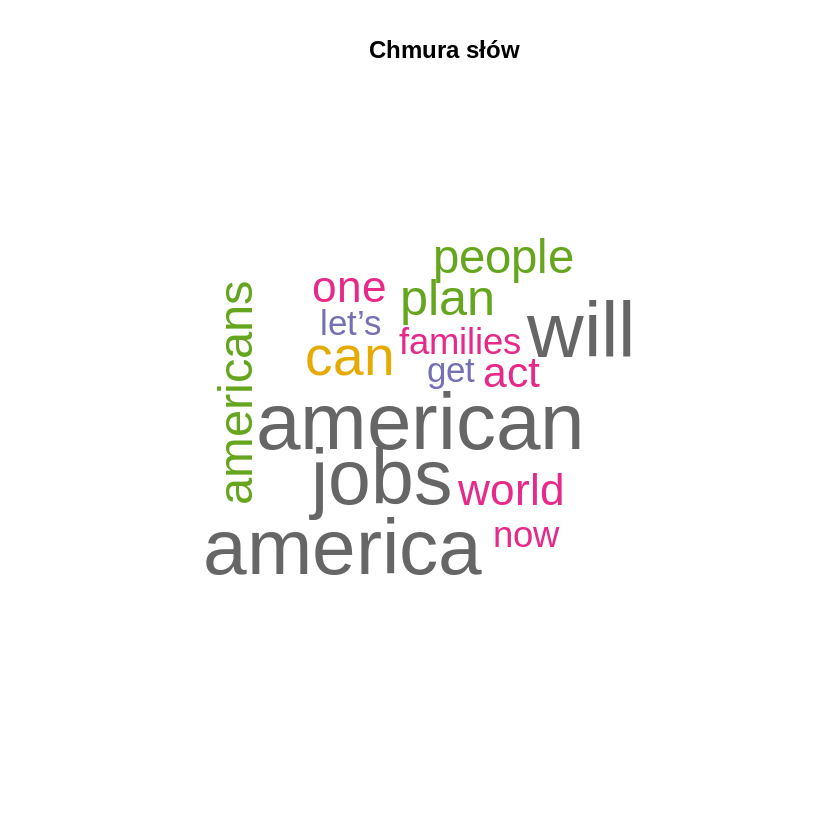

In [9]:
# Potrzeba dodatkowych stop słów do usunięcia ----
custom_stopwords <- c("—", "–", "’s", "’re")


# Usunięcie dodatkowych stop słów z przetworzonego tekstu
# za pomocą indeksowania logicznego
words <- words[!words %in% custom_stopwords]

# Obliczenie częstości występowania słów
freq_df <- word_frequency(words)

# Tworzenie chmury słów
plot_wordcloud(freq_df, "Chmura słów", "Dark2")

In [10]:
# Wyświetlenie 10 najczęściej występujących słów
print(head(freq_df, 10))

          word freq
65    american   45
63     america   44
1349      will   44
679       jobs   43
177        can   29
917       plan   26
67   americans   25
903     people   24
855        one   22
1370     world   22


Najczęściej występujące słowa w pliku Biden2021.txt :
          word freq
1            –   94
11          ’s   45
69    american   45
67     america   44
1353      will   44
683       jobs   43
181        can   29
921       plan   26
71   americans   25
907     people   24



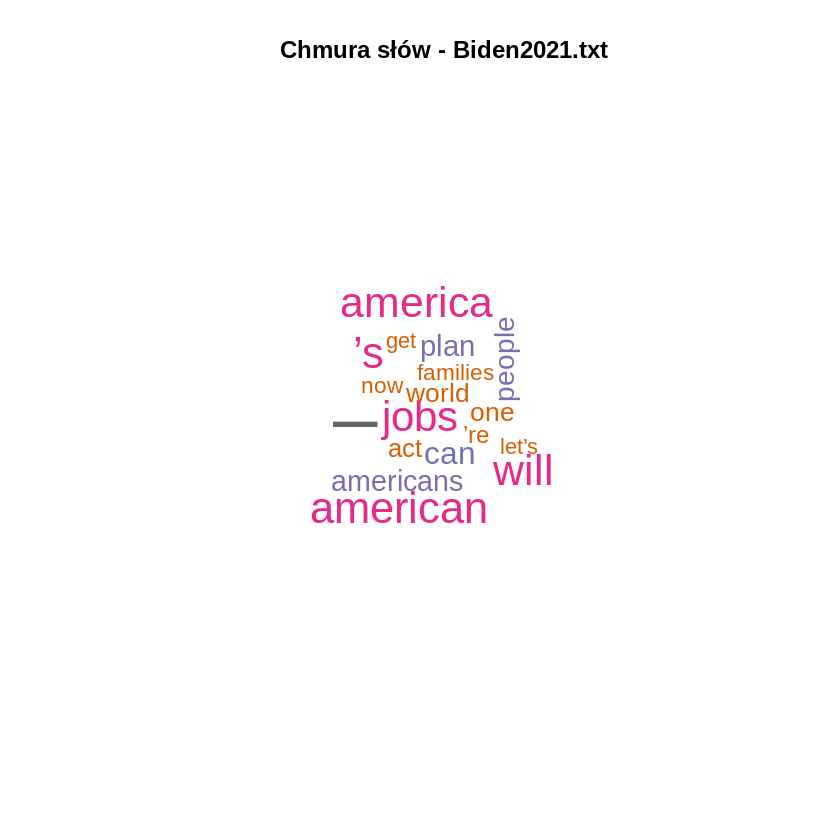

Najczęściej występujące słowa w pliku Biden2024.txt :
          word freq
1            —  215
6           ’s   69
1152 president   47
65     america   41
5          ’re   34
69    american   34
1097    people   34
1650      will   34
7          ’ve   32
4           ’m   31



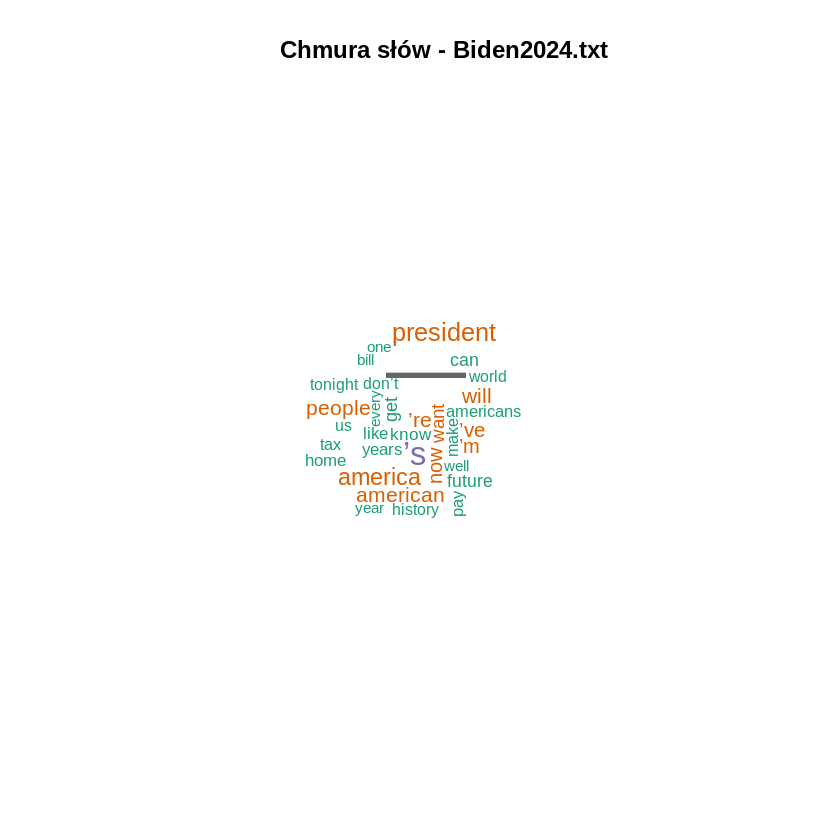

In [11]:
# Dwa pliki txt równocześnie ----


# Lista plików do wczytania
file_paths <- c("Biden2021.txt", "Biden2024.txt")  # Uzupełnij nazwy plików i ustaw Working Directory!


# Przetwarzanie każdego pliku osobno
for (file_path in file_paths) {
  # Wczytanie i przetworzenie tekstu
  words <- process_text(file_path)

  # Obliczenie częstości występowania słów
  freq_df <- word_frequency(words)

  # Tworzenie chmury słów
  plot_wordcloud(freq_df, paste("Chmura słów -", file_path), "Dark2")

  # Wyświetlenie 10 najczęściej występujących słów
  cat("Najczęściej występujące słowa w pliku", file_path, ":\n")
  print(head(freq_df, 10))
  cat("\n")
}

Najczęściej występujące słowa w pliku Biden2021.txt :
          word freq
65    american   45
63     america   44
1349      will   44
679       jobs   43
177        can   29
917       plan   26
67   americans   25
903     people   24
855        one   22
1370     world   22



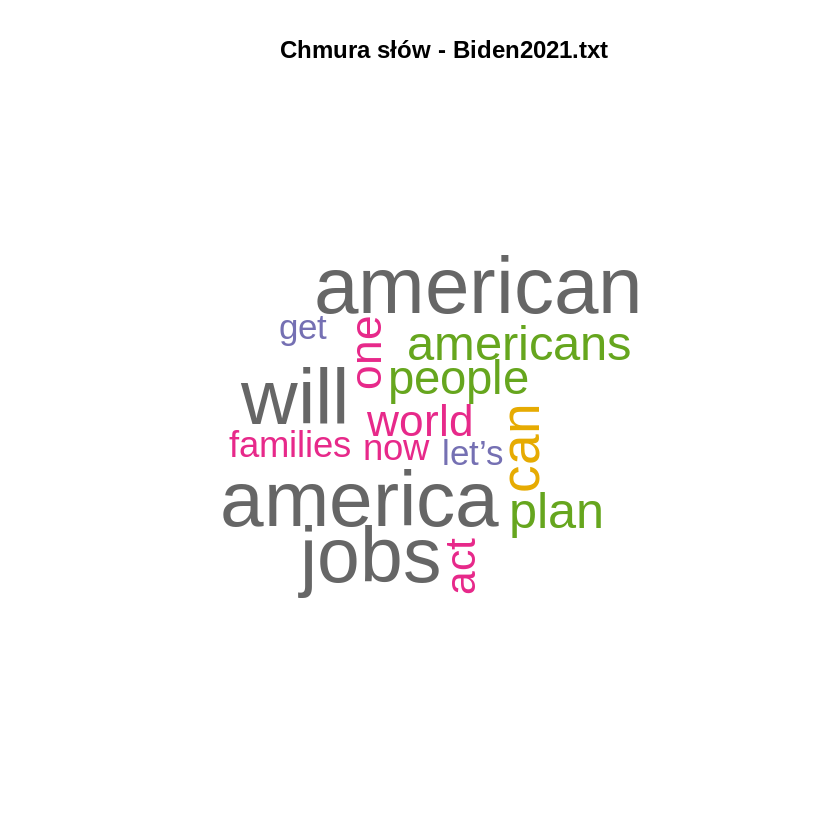

Najczęściej występujące słowa w pliku Biden2024.txt :
          word freq
1149 president   47
62     america   41
66    american   34
1094    people   34
1647      will   34
4          ’ve   32
3           ’m   31
1023       now   31
1619      want   27
624        get   25



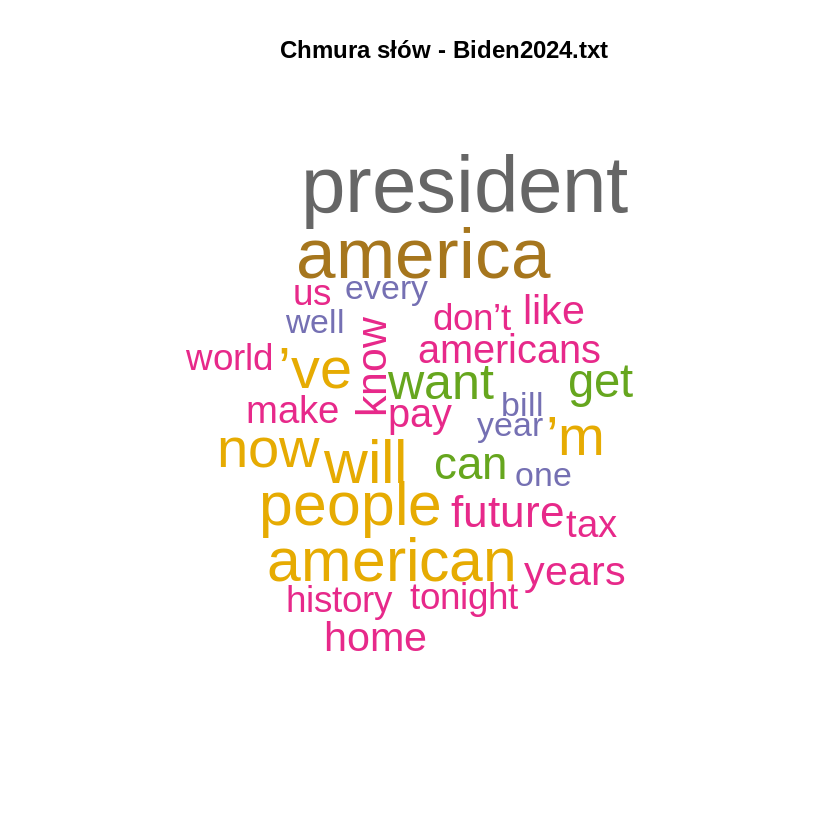

In [12]:
# Potrzeba dodatkowych stop słów do usunięcia ----
custom_stopwords <- c("—", "–", "’s", "’re")

# Przetwarzanie każdego pliku osobno
for (file_path in file_paths) {
  # Wczytanie i przetworzenie tekstu
  words <- process_text(file_path)

  # Usunięcie dodatkowych stop słów z przetworzonego tekstu
  # za pomocą indeksowania logicznego
  words <- words[!words %in% custom_stopwords]

  # Obliczenie częstości występowania słów
  freq_df <- word_frequency(words)

  # Tworzenie chmury słów
  plot_wordcloud(freq_df, paste("Chmura słów -", file_path), "Dark2")

  # Wyświetlenie 10 najczęściej występujących słów
  cat("Najczęściej występujące słowa w pliku", file_path, ":\n")
  print(head(freq_df, 10))
  cat("\n")
}

